# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# LOADING THE DATA

In [2]:
car=pd.read_csv("C:\\Users\\cathe\\Downloads\\car.csv")

# DATA EXPLORATION

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
car.sample(8)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
135,Bajaj Pulsar 150,2015,0.65,0.74,5000,Petrol,Individual,Manual,0
46,ritz,2013,2.65,4.89,64532,Petrol,Dealer,Manual,0
92,innova,2005,3.51,13.70,75000,Petrol,Dealer,Manual,0
113,Mahindra Mojo XT300,2016,1.15,1.40,35000,Petrol,Individual,Manual,0
127,Bajaj Avenger 150,2016,0.75,0.80,7000,Petrol,Individual,Manual,0
190,Bajaj Pulsar 150,2008,0.20,0.75,60000,Petrol,Individual,Manual,0
282,city,2014,8.25,14.00,63000,Diesel,Dealer,Manual,0
163,Bajaj Avenger 220 dtsi,2010,0.45,0.95,27000,Petrol,Individual,Manual,0


In [6]:
car.shape

(301, 9)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [10]:
car.index

RangeIndex(start=0, stop=301, step=1)

In [11]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
car.min()

Car_Name               800
Year                  2003
Selling_Price          0.1
Present_Price         0.32
Driven_kms             500
Fuel_Type              CNG
Selling_type        Dealer
Transmission     Automatic
Owner                    0
dtype: object

In [13]:
car.max()

Car_Name              xcent
Year                   2018
Selling_Price          35.0
Present_Price          92.6
Driven_kms           500000
Fuel_Type            Petrol
Selling_type     Individual
Transmission         Manual
Owner                     3
dtype: object

In [14]:
car.mean()

C:\Users\cathe\AppData\Local\Temp/ipykernel_9980/1170622532.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.mean()


Year              2013.627907
Selling_Price        4.661296
Present_Price        7.628472
Driven_kms       36947.205980
Owner                0.043189
dtype: float64

In [15]:
car.median()

C:\Users\cathe\AppData\Local\Temp/ipykernel_9980/961299306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.median()


Year              2014.0
Selling_Price        3.6
Present_Price        6.4
Driven_kms       32000.0
Owner                0.0
dtype: float64

In [16]:
car.mode()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,city,2015.0,0.45,9.4,15000,Petrol,Dealer,Manual,0.0
1,NaN,NaN,0.60,NaN,45000,NaN,NaN,NaN,NaN


In [17]:
car["Year"].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [18]:
car["Year"].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

# DATA CLEANING


In [19]:
car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# VISUALIZATION

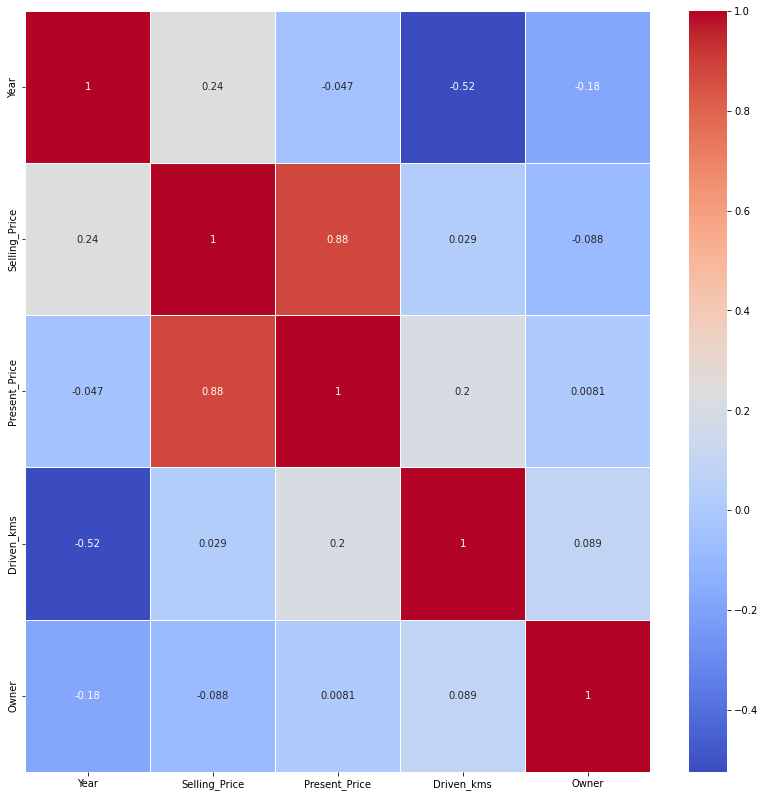

In [20]:
corr = car.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

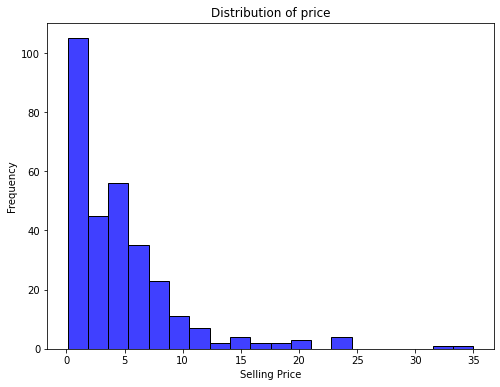

In [21]:
#Visualizing Data Distributions
plt.figure(figsize=(8, 6))
sns.histplot(car['Selling_Price'], bins=20, color='blue')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of price')
plt.show()


# ENCODING

In [22]:
car_cat = car.select_dtypes(include=['object'])

# Calculate and display the number of unique values for each category columns
for column in car_cat.columns:
    unique_count = car_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'Car_Name' has 98 unique values.
Column 'Fuel_Type' has 3 unique values.
Column 'Selling_type' has 2 unique values.
Column 'Transmission' has 2 unique values.


In [23]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=car_cat)                               
car = encoder.fit_transform(car)
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1,2014,3.35,5.59,27000,1,1,1,0
1,2,2013,4.75,9.54,43000,2,1,1,0
2,3,2017,7.25,9.85,6900,1,1,1,0
3,4,2011,2.85,4.15,5200,1,1,1,0
4,5,2014,4.60,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...,...,...
296,95,2016,9.50,11.60,33988,2,1,1,0
297,96,2015,4.00,5.90,60000,1,1,1,0
298,95,2009,3.35,11.00,87934,1,1,1,0
299,95,2017,11.50,12.50,9000,2,1,1,0


# ML MODEL

In [24]:
x = car.drop('Selling_Price', axis=1)
y = car['Selling_Price']

In [25]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [26]:
x

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,1,2014,5.59,27000,1,1,1,0
1,2,2013,9.54,43000,2,1,1,0
2,3,2017,9.85,6900,1,1,1,0
3,4,2011,4.15,5200,1,1,1,0
4,5,2014,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...,...
296,95,2016,11.60,33988,2,1,1,0
297,96,2015,5.90,60000,1,1,1,0
298,95,2009,11.00,87934,1,1,1,0
299,95,2017,12.50,9000,2,1,1,0


In [27]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [29]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred = lreg.predict(x_train)
print("R-squared:", lreg.score(x_train, y_train).round(2))
print("Coefficient:", lreg.coef_.round(2))
print("Intercept:", lreg.intercept_.round(3))


R-squared: 0.89
Coefficient: [ 0.25  1.02  3.82 -0.22  0.64 -0.51  0.58 -0.24]
Intercept: 4.719


Text(0.5, 1.0, 'Residuals')

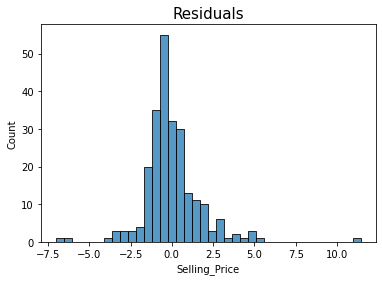

In [32]:
sns.histplot(y_train - y_pred)
plt.title("Residuals", size=15)

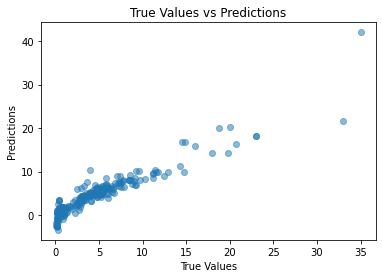

In [36]:
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()

In [38]:
df = pd.DataFrame()
df['Price'] = y_train
df['Prediction'] = y_pred.round(2)
df['Residual'] = (y_train - y_pred).round(2)
df['Difference%'] = (np.absolute((y_train - y_pred) / y_train * 100)).round(2)
df

,Price,Prediction,Residual,Difference%
184,0.25,-2.48,2.73,1091.00
132,0.75,1.86,-1.11,147.76
194,0.20,-1.34,1.54,768.43
75,3.95,4.48,-0.53,13.38
111,1.15,1.67,-0.52,45.61
...,...,...,...,...
188,0.25,0.49,-0.24,94.20
71,4.50,7.02,-2.52,55.92
106,1.35,0.80,0.55,40.42
270,4.10,4.83,-0.73,17.77
